In [1]:
import pandas as pd


In [2]:
df_link = pd.read_csv("/content/links.csv")
df_movies = pd.read_csv('/content/movies.csv')
df_rating = pd.read_csv('/content/ratings.csv')
df_tags = pd.read_csv("/content/tags.csv")

In [3]:
print('link: ',df_link.shape)
print('Movies: ',df_movies.shape)
print('Rating: ',df_rating.shape)
print('Tags: ',df_tags.shape)

link:  (9742, 3)
Movies:  (9742, 3)
Rating:  (100836, 4)
Tags:  (3683, 4)


In [4]:
df_rating['userId'].nunique()

KeyError: 'user'

In [5]:
merged_df = pd.merge(df_movies, df_rating, on='movieId')
filtered_df = merged_df[merged_df['title'].str.contains('Matrix|Pulp Fiction|Forrest Gump|Shawshank Redemption', case=False)]
result_df = filtered_df.groupby('title')['rating'].mean().reset_index()
result_df = result_df.sort_values(by='rating', ascending=False)
print(result_df)

                              title    rating
6  Shawshank Redemption, The (1994)  4.429022
5               Pulp Fiction (1994)  4.197068
4                Matrix, The (1999)  4.192446
1               Forrest Gump (1994)  4.164134
0             Animatrix, The (2003)  3.700000
2       Matrix Reloaded, The (2003)  3.354167
3    Matrix Revolutions, The (2003)  3.151899


In [6]:
merged_df = pd.merge(df_movies, df_tags, on='movieId')
filtered_df = merged_df[merged_df['title'] == 'Matrix, The (1999)']
print(filtered_df[['title', 'tag']])

                   title                 tag
1313  Matrix, The (1999)        martial arts
1314  Matrix, The (1999)              sci-fi
1315  Matrix, The (1999)  alternate universe
1316  Matrix, The (1999)          philosophy
1317  Matrix, The (1999)    post apocalyptic


In [7]:
merged_df = pd.merge(df_movies, df_rating, on='movieId')
filtered_df = merged_df[merged_df['title'] == 'Terminator 2: Judgment Day (1991)']
avg_rating = filtered_df['rating'].mean()
display(avg_rating)

3.970982142857143

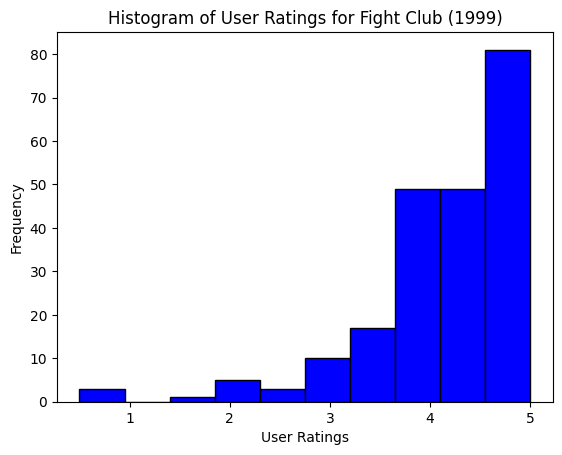

Skewness: -1.8603186380018706


In [8]:
import matplotlib.pyplot as plt


# Merge movies and ratings DataFrames
ratings_fight_club = pd.merge(df_movies, df_rating, on='movieId', how='inner')

# Filter rows for 'Fight Club (1999)'
ratings_fight_club = ratings_fight_club[ratings_fight_club['title'] == 'Fight Club (1999)']


plt.hist(ratings_fight_club['rating'], bins=10, color='blue', edgecolor='black')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of User Ratings for Fight Club (1999)')
plt.show()

# Calculate skewness
skewness = ratings_fight_club['rating'].skew()
print(f"Skewness: {skewness}")


In [9]:
grouped_ratings = df_rating.groupby("movieId").agg(
    rating_count=pd.NamedAgg(column="rating", aggfunc="count"),
    average_rating=pd.NamedAgg(column="rating", aggfunc="mean")
).reset_index()

In [10]:
merge_df = pd.merge(df_movies, grouped_ratings, on='movieId', how='inner')
filter_df = merge_df[merge_df['rating_count'] > 50]

In [11]:
top_movie = filter_df.sort_values(by='average_rating', ascending=False).head(1)
print(top_movie[['title', 'average_rating']])

                                title  average_rating
277  Shawshank Redemption, The (1994)        4.429022


In [12]:
top_movies_by_rating_count = filter_df.sort_values(by='rating_count', ascending=False).head(5)
print(top_movies_by_rating_count[['title', 'rating_count']])

                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [13]:
sci_fi_movies = filter_df[filter_df['genres'].str.contains('Sci-Fi', case=False, na=False)]
top_sci_fi_movies_by_rating_count = sci_fi_movies.sort_values(by='rating_count', ascending=False).head(5)
print(top_sci_fi_movies_by_rating_count[['title', 'rating_count']])

                                                  title  rating_count
1938                                 Matrix, The (1999)           278
224           Star Wars: Episode IV - A New Hope (1977)           251
418                                Jurassic Park (1993)           238
507                   Terminator 2: Judgment Day (1991)           224
897   Star Wars: Episode V - The Empire Strikes Back...           211


In [14]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating_tag = soup.find('span', itemprop='ratingValue')
    return imdb_rating_tag.text if imdb_rating_tag else np.nan


In [ ]:
df_link['imdb_rating'] = df_link['imdbId'].apply(scrapper)

In [ ]:
top_movie_by_imdb_rating = df_link.sort_values(by='imdb_rating', ascending=False).head(1)
print(top_movie_by_imdb_rating[['movieId', 'imdb_rating']])

In [ ]:
merged_df = pd.merge(df_link, df_tags, on='movieId', how='inner')

sci_fi_movies = merged_df[merged_df['tag'].str.contains('sci-fi', case=False, na=False)]


top_sci_fi_movie_by_imdb_rating = sci_fi_movies.sort_values(by='imdb_rating', ascending=False).head(1)

print(top_sci_fi_movie_by_imdb_rating[['movieId', 'imdb_rating']])